In [1]:
from __future__ import division
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import argparse
import json
import csv
import sys
import time
from lib import bitmex
from lib.bitmex import BitMEX
from settings import API_BASE, API_KEY, API_SECRET
import scipy as sp
from scipy.stats import *
from scipy.stats import skew, kurtosis
from scipy.signal import *

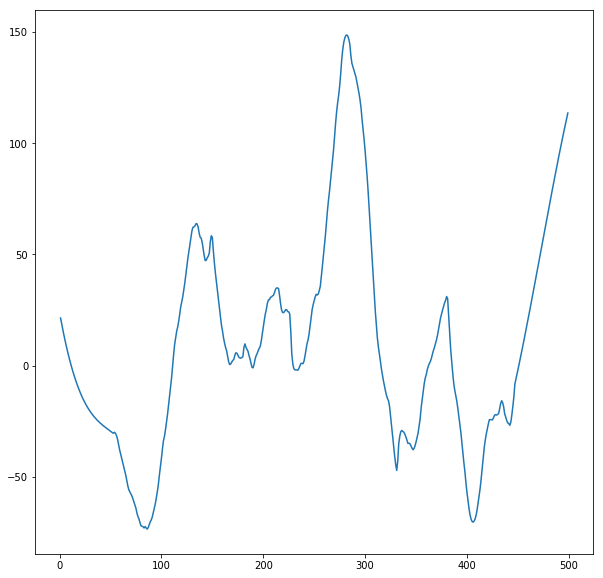

In [127]:
m = 3
J = np.arange(1, l)
df500 = pd.DataFrame(CCI_500)
plt.plot(J,CCI_500[J])

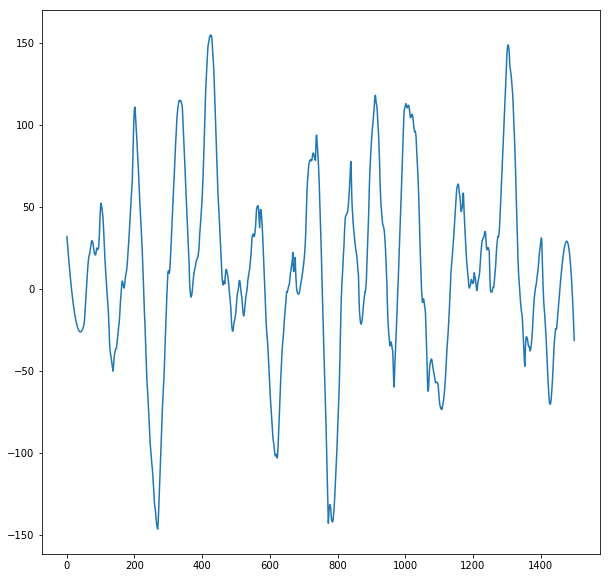

In [ ]:
pd.set_option('display.max_rows', 2000)
J = np.arange(0, 1500)
#plt.plot(J,CCI_7d[J])
CCI_1d_DF = pd.DataFrame(CCI_1d)
print(CCI_1d_DF.iloc[J])

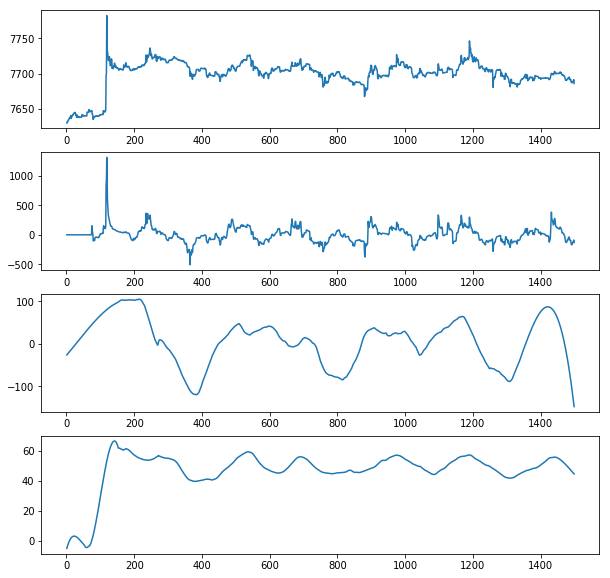

In [21]:
## THERE'S SOMETHING HERE ####
CCIsav = sp.signal.savgol_filter(CCI, 305, 3)
fil = sp.signal.savgol_filter(RSI100, 105, 3)
dFdt = pd.Series(np.zeros(l))
dF2 = pd.Series(np.zeros(l))
for i in range(1, len(fil)):
    dFdt[i] = fil[i]-fil[i-1]
    dF2[i] = dFdt[i] - dFdt[i-1]
dFdt = sp.signal.savgol_filter(dFdt, 25, 3)
dF2 = sp.signal.savgol_filter(dF2, 75, 3)

plt.rcParams['figure.figsize'] = [10, 10]

m = 4
J = np.arange(1, l)
plt.subplot(m,1,1)
plt.plot(J, close[J])
#plt.subplot(5,1,2)
#plt.plot(J, CCI[J])
plt.subplot(m,1,2)
plt.plot(J, CCI[J])
plt.subplot(m,1,3)
plt.plot(J, CCIsav[J])
#plt.subplot(4,1,2)
#plt.plot(J, CCI[J])
plt.subplot(m,1,4)
plt.plot(J, fil[J])


plt.show()
#print(sp.stats.skew(CCI[J]))

0.9185123913325564


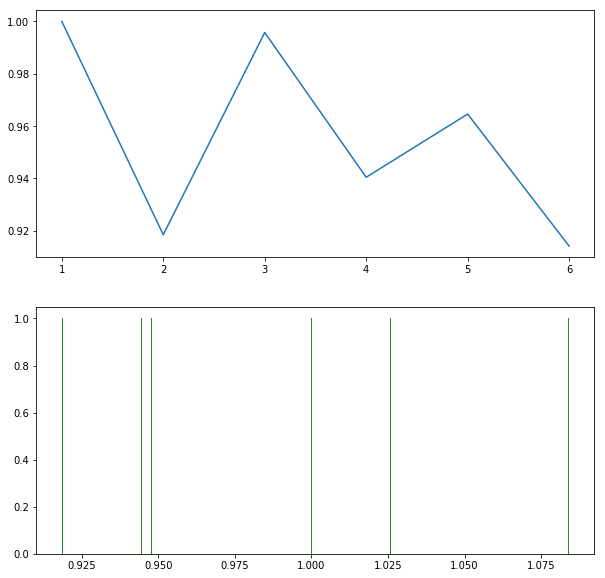

0.9867473133160375
        0       1       2       3         4         5
0  7706.0  7707.0   164.0   203.0  0.918512  0.918512
1  7723.5  7699.0   274.0   465.0  1.084112  0.995770
2  7709.0  7706.0   554.0   648.0  0.944465  0.940470
3  7713.0  7697.5   714.0   947.0  1.025682  0.964623
4  7708.5  7705.0  1000.0  1155.0  0.947713  0.914186
5  7717.0  7696.0  1216.0  1352.0  0.000000  0.000000


In [17]:
## Short Only ##  (Why is it backwards???)
leverage = 50
#price = pd.DataFrame(np.zeros((l-cci_len, 6)))
#mat = np.zeros((20, 1200))
#pnl = 1;
#leverage = 10
f=0
d=0
high = 50
low = -50
j = 0
k = 0
price = np.zeros((l-cci_len, 6))
for i in range(cci_len, l):
    if (CCIsav[i] <= low and j == 0):
        j = 1
        price[k, 0] = close[i]
        price[k, 2] = i
    #elif j == 1 and close[i] <= (.95)*price[k,0]:
    #    j = 0
   #     price[k, 1] = close[i]
   #     price[k, 3] = i
   #     k = k+1
    elif (CCIsav[i] >= high) and (j==1):
        #mat[j,k] = RSIclose[i]
        price[k, 3] = i 
        price[k, 1] = close[i]
        k = k+1
        j = 0
   # d = 1
price = np.delete(price, np.s_[k::], 0)
pnl = np.ones(len(price))
pnlT = np.ones(len(price))
X = 0
X2= abs(X-1)
p = 0
p2 = abs(p-1)
for i in range(0, len(price)-1):
    check = (price[i,X]/price[i,X2]-1-.00075*2)*leverage
    if check > 1:
        p = 1
        p2 = abs(p-1)
    else:
        p = 0
        p2 = abs(p-1)
    pnl[i+1] = (p2+(price[i,X]/price[i,X2]-1-.00075*2)*leverage)
    pnlT[i+1] = pnlT[i]*(p2+(price[i,X]/price[i,X2]-1-.00075*2)*leverage)
    price[i, 4] = pnl[i+1]
    price[i, 5] = pnlT[i+1]
plt.subplot(2,1,1)
#plt.plot(range())
plt.plot(range(1,len(pnl)+1), pnlT, label='Boys per Time')
plt.subplot(2,1,2)
n, bins, patches = plt.hist(pnl, 500, density=False, facecolor='g', alpha=0.85)
print(min(pnl))

plt.show()

## change into DataFrames ##

price = pd.DataFrame(price)

print(np.average(pnl))
print(price)

2.3967907818

In [34]:
priceDF = pd.DataFrame(price)

In [5]:
4.579964*1.5759

7.217565267600001

In [4]:
(7544/7416 - 1-.00075*2)*100

1.575997842502691

In [119]:
len(close)

1000

In [118]:
name

'500J3.csv'

In [18]:
## CCI and RSI init only ##
df1 = pd.read_csv(name)
df_all = pd.DataFrame(df1)
df_all = pd.DataFrame(df_all.values[::-1], df_all.index, df_all.columns) # turn around data

close = pd.Series(df_all['close'])
high = pd.Series(df_all['high'])
low = pd.Series(df_all['low'])
l = len(close)
CCI = pd.Series(np.zeros(l))
SMA = pd.Series(np.zeros(l))
madmat = pd.Series(np.zeros(l))
cci_len=75
TP = (high+low+close)/3
for i in range(cci_len, len(close)):
    SMA[i] = TP[i-cci_len:i].sum()/cci_len
    madmat[i] = abs(SMA[i]-TP[i])
    for j in range(1, cci_len):
        madmat[i] = madmat[i] + abs(SMA[i]-TP[i-j])
    madmat[i] = madmat[i]/cci_len
    CCI[i] = (TP[i]-SMA[i])/(.015*madmat[i])
j = 0
k = 0

#mat = np.zeros((20, 1200))
#pnl = 1;
#leverage = 10
f=0
d=0
rsi_len = 100
change_close = pd.Series(np.zeros(l))
gain = pd.Series(np.zeros(l))
loss = pd.Series(np.zeros(l))
smagain = pd.Series(np.zeros(l))
smaloss = pd.Series(np.zeros(l))
RS = pd.Series(np.zeros(l))
RSI100 = pd.Series(np.zeros(l))
dRdt = pd.Series(np.zeros(l))
dR2dt = pd.Series(np.zeros(l))
for i in range(1,len(close)):   
    #print(close[i])
    change_close[i] = close[i]-close[i-1]
    if change_close[i] > 0:
        gain[i] = change_close[i]
    elif change_close[i] < 0:
        loss[i] = change_close[i]*-1
    elif change_close[i] == 0.00000:
        loss[i] = 0
        gain[i] = 0
    if i == rsi_len:   
        smagain[rsi_len] = gain[i-rsi_len:i].sum()/rsi_len
        smaloss[rsi_len] = loss[i-rsi_len:i].sum()/rsi_len
    elif i > rsi_len: 
        smagain[i] = gain[i-rsi_len:i].sum()/rsi_len
        smaloss[i] = loss[i-rsi_len:i].sum()/rsi_len
        if smaloss[i] == 0:
            RSI100[i] = 100
        else:
            RS[i] = smagain[i]/smaloss[i]
            RSI100[i] = 100 - 100/(1+RS[i])
           #print(RSIclose[i])
CCI_500 = sp.signal.savgol_filter(CCI, 105, 3)
fil = sp.signal.savgol_filter(RSI100, 105, 3)

In [9]:
def dl(start, end, name):
    # Create connector
    connector = bitmex.BitMEX(base_url=API_BASE)

    # Do trade history query
    path = "trade/bucketed?binSize=5m&symbol=XBTUSD&columns=symbol%2C%20timestamp%2C%20close%2C%20high%2C%20low"
    count = 500  # max API will allow
    query = {
        'reverse': 'true',
        'start': start,
        'count': count,
        }

    csvwriter = None
    with open(name, 'w+') as f:
        while True:
            data = connector._curl_bitmex(path=path, verb="GET", query=query, timeout=5)
            if csvwriter is None:
                # csv requires dict keys
                if len(data) == 0:
                    break
                keys = sorted(data[0].keys())
                # Write to stdout
                csvwriter = csv.DictWriter(f, fieldnames=keys)
                csvwriter.writeheader()

            csvwriter.writerows(data)
            #data2 = pd.DataFrame
            data2 = np.append(data, data)
            query['start'] += count
            if query['start'] > end:
                break
            if len(data) < count:
                break

In [74]:
M = 7
name = '1440_7_Jun3.csv'
dl(0, 1440*M, name)

In [2]:
name = '1440_Jun3.csv'

In [ ]:
name = '1440_30_Jun3.csv'

In [92]:
name = '1440_7_Jun3.csv'

In [114]:
name = '500J3.csv'

In [126]:
len(close)

500

In [124]:
dlshort(500, '500J3.csv')

In [120]:
def dlshort(num, name):
    # Create connector
    connector = bitmex.BitMEX(base_url=API_BASE)

    # Do trade history query
    path = "trade/bucketed?binSize=5m&symbol=XBTUSD&columns=symbol%2C%20timestamp%2C%20close%2C%20high%2C%20low"
    count = num  # max API will allow
    query = {
        'reverse': 'true',
        'start': 0,
        'count': count,
        }

    csvwriter = None
    with open(name, 'w+') as f:
        while True:
            data = connector._curl_bitmex(path=path, verb="GET", query=query, timeout=5)
            if csvwriter is None:
                # csv requires dict keys
                if len(data) == 0:
                    break
                keys = sorted(data[0].keys())
                # Write to stdout
                csvwriter = csv.DictWriter(f, fieldnames=keys)
                csvwriter.writeheader()

            csvwriter.writerows(data)
            #data2 = pd.DataFrame
            data2 = np.append(data, data)
            query['start'] += count
            if query['start'] > num-1:
                break
            if len(data) < count:
                break

In [ ]:
## LONG AND SHORT ##



J = np.arange(1, 1440)

leverage = 10
lowLong = -200
highLong = 200

highShort = 50
lowShort = -200
j = 0
k = 0
price = np.zeros((l-cci_len, 6))
for i in range(cci_len, l):
   
    # Check if it's going up or down
    




    if LONG = 1:   
    
        if (CCI[i] <= lowLong and j == 0):
            j = 1
            price[k, 0] = close[i]
            price[k, 2] = i

        elif (CCI[i] >= highLong) and (j==1):
            #mat[j,k] = RSIclose[i]
            price[k, 3] = i 
            price[k, 1] = close[i]
            k = k+1
            j = 0
        ## SWITCH ##
        #elif j == 1 and close[i] <= (.95)*price[k,0]:
           # j = 0
            #price[k, 1] = close[i]
            #price[k, 3] = i
            #k = k+1



    if SHORT = 1:
        if (CCI[i] >= highShort and j == 0):
            j = 1
            price[k, 0] = close[i]
            price[k, 2] = i

        elif (CCI[i] <= lowShort) and (j==1):
            #mat[j,k] = RSIclose[i]
            price[k, 3] = i 
            price[k, 1] = close[i]
            k = k+1
            j = 0

    ##SWITCH    
    #elif j == 1 and close[i] <= (.95)*price[k,0] and SHORT = 1:
    #    j = 0
   #     price[k, 1] = close[i]
   #     price[k, 3] = i
   #     k = k+1
price = np.delete(price, np.s_[k::], 0)
pnl = np.ones(len(price))
pnlT = np.ones(len(price))
X = 0
X2= abs(X-1)
for i in range(0, len(price)-1):
    pnl[i] = (1+(price[i,X]/price[i,X2]-1-.00075*2)*leverage)
    pnlT[i+1] = pnlT[i]*(1+(price[i,X]/price[i,X2]-1-.00075*2)*leverage)
    price[i, 4] = pnl[i+1]
    price[i, 5] = pnlT[i+1]
plt.subplot(2,1,1)
plt.plot(J, close[J])
#plt.plot(range())
#plt.subplot(2,1,1)
#plt.plot(range())
plt.subplot(2,1,2)
plt.plot(range(1,len(pnl)+1), pnlT, label='Boys per Time')
plt.show()
print(sp.stats.skew(CCI))